In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np
#import plotly.express as px

In [19]:
url = 'https://www.worldometers.info/coronavirus/'

In [20]:
headers = {'User-Agent':'Mozilla/5.0'}

In [21]:
response = requests.get(url, headers=headers)

In [22]:
response.status_code

200

In [23]:
soup = BeautifulSoup(response.content, 'html.parser')

In [24]:
main_table = soup.find(id='main_table_countries_today')

In [25]:
# type(main_table)

In [26]:

# for thead in main_table.find_all('thead'):
#     for tr in thead.find_all('tr'):
#         with open('testfile.csv','w') as o:
#             for th in tr.find_all('th'):
#                 print(th.text)
#                 w = csv.writer(o)
#                 w.writerow([th.text])


In [27]:
# for thead in main_table.find_all('thead'):
#     for tr in thead.find_all('tr'):
# #         with open('testfile.csv','w') as o:
#         for th in tr.find_all('th'):
#             print(th.text+',',end = '')
            

In [28]:
# with open('testfile.csv','w') as o:
#     w = csv.writer(o)
#     w.writerow([th.text])
#     for r in tr:
#         w.writerow([r])
    

In [29]:
i=0
with open('textfile.txt','w') as r:
    for tbody in main_table.find_all('tbody'):
        for row in tbody.find_all('tr'):
            for cell in row.find_all('td'):
    #                 cell[0]
    #                 print(i)
    #                 print(int(cell)%9)
                cellText = cell.text.strip()
                cellText = cellText.replace(' ','')
                cellText = cellText.replace('.','')
                cellText = cellText.replace(',','')
                cellText = cellText.replace('+','')
#                 print(cellText) 
                r.write(cellText+" ")
            r.write('\n')
    #                 print('\n')
    #                 w = csv.writer(o)
    #                 w.writerow([cellText])

    #                 if(i==0):
    #                     break;
    # #                     print('\n')

        #             with open('testfile.csv','w') as o:
        #                 w = csv.writer(o)
        #                 w.writerow([cell.text]

In [30]:
text_file = "textfile.txt"
csv_file=r"convertedfile.csv"

in_text = csv.reader(open(text_file,"r"), delimiter=' ')
out_csv = csv.writer(open(csv_file,"w"))

out_csv.writerows(in_text)

In [31]:
# with open('convertedfile.csv',newline='') as f:
#     r=csv.reader(f)
#     data = [line for line in r]
    
# with open ('convertedfile.csv','w',newline='') as f:
#     w=csv.writer(f)
#     w.writerow(["Country","Total Cases","New Cases","Total Deaths","New Deaths","Total Recovered","Active Cases","Serious/Critical","Total Cases/1 Population"])
#     w.writerows(data)

In [32]:
# f = open(csv_file,"w")
# writer = csv.DictWriter(f,fieldnames=["Country","Total Cases","New Cases","Total Deaths","New Deaths","Total Recovered","Active Cases","Serious/Critical","Total Cases/1M Population"])
# writer.writeheader()
# f.close()

In [33]:
# reader = csv.DictReader(open('convertedfile.csv'))
# writer = csv.DictWriter(open('cleanfile.csv', 'w'), fieldnames=reader.fieldnames)

# for row in reader:
#     if all(col != '' for col in row.values()):
#         continue

#     writer.writerow(row)

In [34]:
df = pd.read_csv(csv_file,encoding='iso-8859-1',index_col=0)

In [35]:
df.shape

(198, 10)

In [36]:
#df

In [37]:
df = df.drop(df.columns[[9]],axis=1)

In [38]:
#df

In [39]:
df.shape

(198, 9)

In [40]:
df.rename({"Unnamed: 2":""}, axis="columns", inplace=True)
df.rename({"Unnamed: 4":""}, axis="columns", inplace=True)
df.rename({"Unnamed: 9":""}, axis="columns", inplace=True)
df.rename({"Unnamed: 10":""}, axis="columns", inplace=True)

In [41]:
#df = df.drop(df.columns[[9]],axis=1,inplace=True)

In [42]:
df

,81171,,3277,,73159,4735,1573,56,2
China,,,,,,,,,
Italy,69176,5249.0,6820.0,743.0,8326.0,54030,3393.0,1144.0,113.0
USA,53609,9875.0,698.0,145.0,378.0,52533,1175.0,162.0,2.0
Spain,42058,6922.0,2991.0,680.0,3794.0,35273,2636.0,900.0,64.0
Germany,32991,3935.0,159.0,36.0,3290.0,29542,23.0,394.0,2.0
Iran,24811,1762.0,1934.0,122.0,8913.0,13964,NaN,295.0,23.0
...,...,...,...,...,...,...,...,...,...
Somalia,1,NaN,NaN,NaN,NaN,1,NaN,6.0,NaN
Syria,1,NaN,NaN,NaN,NaN,1,NaN,6.0,NaN
Timor-Leste,1,NaN,NaN,NaN,NaN,1,NaN,8.0,NaN


In [43]:
df.to_csv('modified_df.csv')

In [44]:
with open('modified_df.csv',newline='') as f:
    r=csv.reader(f)
    data = [line for line in r]
    
with open ('modified_df.csv','w',newline='') as f:
    w=csv.writer(f)
    w.writerow(["Country","Total Cases","New Cases","Total Deaths","New Deaths","Total Recovered","Active Cases","Serious/Critical","Total Cases/1 Population"])
    w.writerows(data)

In [45]:
df.shape

(198, 9)

In [46]:
df

,81171,,3277,,73159,4735,1573,56,2
China,,,,,,,,,
Italy,69176,5249.0,6820.0,743.0,8326.0,54030,3393.0,1144.0,113.0
USA,53609,9875.0,698.0,145.0,378.0,52533,1175.0,162.0,2.0
Spain,42058,6922.0,2991.0,680.0,3794.0,35273,2636.0,900.0,64.0
Germany,32991,3935.0,159.0,36.0,3290.0,29542,23.0,394.0,2.0
Iran,24811,1762.0,1934.0,122.0,8913.0,13964,NaN,295.0,23.0
...,...,...,...,...,...,...,...,...,...
Somalia,1,NaN,NaN,NaN,NaN,1,NaN,6.0,NaN
Syria,1,NaN,NaN,NaN,NaN,1,NaN,6.0,NaN
Timor-Leste,1,NaN,NaN,NaN,NaN,1,NaN,8.0,NaN


In [47]:
mod_df = pd.read_csv('modified_df.csv',encoding='iso-8859-1',index_col=False)

In [48]:
#mod_df

In [49]:
top10 = mod_df.head(10)

In [50]:
top10

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious/Critical,Total Cases/1 Population
0,China,81171,NaN,3277.0,NaN,73159.0,4735,1573.0,56.0
1,Italy,69176,5249.0,6820.0,743.0,8326.0,54030,3393.0,1144.0
2,USA,53609,9875.0,698.0,145.0,378.0,52533,1175.0,162.0
3,Spain,42058,6922.0,2991.0,680.0,3794.0,35273,2636.0,900.0
4,Germany,32991,3935.0,159.0,36.0,3290.0,29542,23.0,394.0
5,Iran,24811,1762.0,1934.0,122.0,8913.0,13964,NaN,295.0
6,France,22304,2448.0,1100.0,240.0,3281.0,17923,2516.0,342.0
7,Switzerland,9877,1082.0,122.0,2.0,131.0,9624,141.0,1141.0
8,SKorea,9037,76.0,120.0,9.0,3507.0,5410,59.0,176.0
9,UK,8077,1427.0,422.0,87.0,135.0,7520,20.0,119.0


In [51]:
bottom10 = mod_df.tail(10)

In [52]:
#bottom10

In [53]:
xCountry=top10["Country"]
yTotalCases=top10["Total Cases"]

In [54]:
plt.rcParams['figure.figsize'] = (14,8)

<BarContainer object of 10 artists>

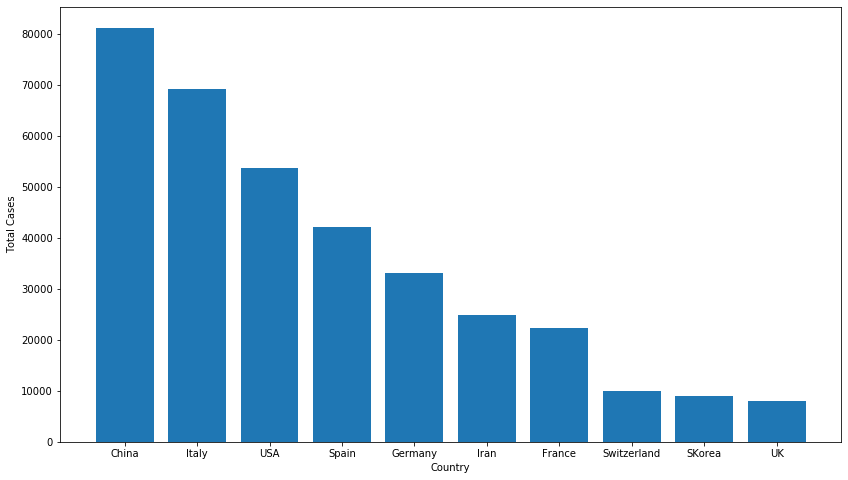

In [55]:
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.bar(xCountry,yTotalCases)
#y_pos = [0,10,20,30,40,50,60,70,80,90]
#plt.bar(y_pos,y)
#plt.xticks(y_pos,x)

<ipython-input-56-02d8af8884bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10SortedByNewCases = top10.sort_values(by="New Cases",inplace=True,ascending=False)


Text(0, 0.5, 'New Cases')

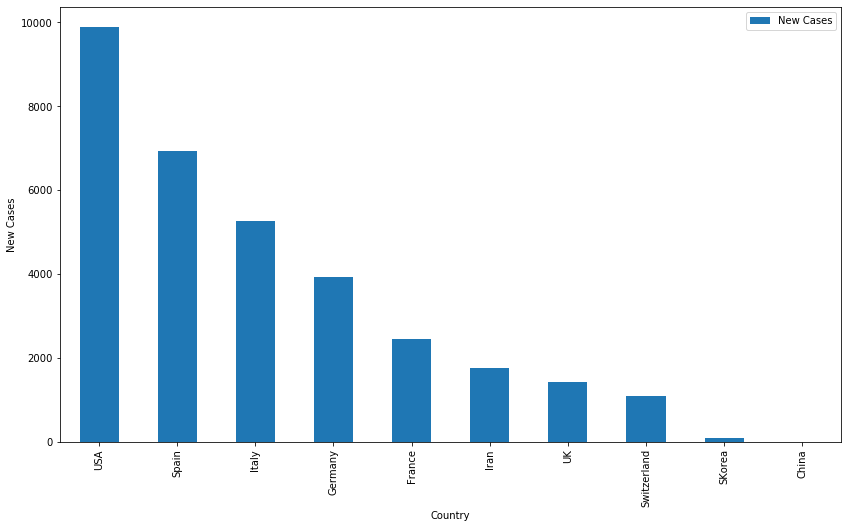

In [56]:
xCountry = top10["Country"]
yNewCases = top10["New Cases"]
top10SortedByNewCases = top10.sort_values(by="New Cases",inplace=True,ascending=False)
top10SortedByNewCasesX = top10.plot(y="New Cases",kind="bar")
_ = top10SortedByNewCasesX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('New Cases')

<ipython-input-57-ad0ed8c33997>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10SortedByTotalDeaths = top10.sort_values(by="Total Deaths",inplace=True,ascending=False)


Text(0, 0.5, 'Total Deaths')

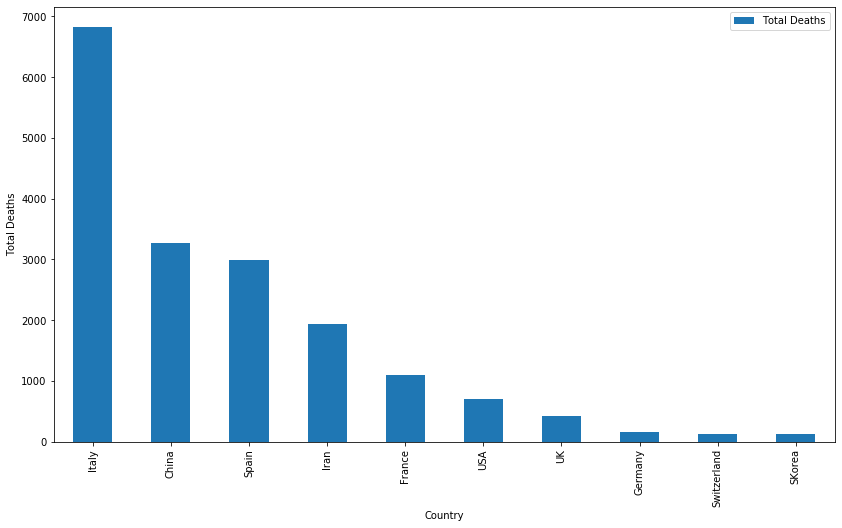

In [57]:
xCountry = top10["Country"]
yTotalDeaths = top10["Total Deaths"]
top10SortedByTotalDeaths = top10.sort_values(by="Total Deaths",inplace=True,ascending=False)
top10SortedByTotalDeathsX = top10.plot(y="Total Deaths",kind="bar")
_ = top10SortedByTotalDeathsX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('Total Deaths')

<ipython-input-58-21bd7822e861>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10SortedByNewDeaths = top10.sort_values(by="New Deaths",inplace=True,ascending=False)


Text(0, 0.5, 'New Deaths')

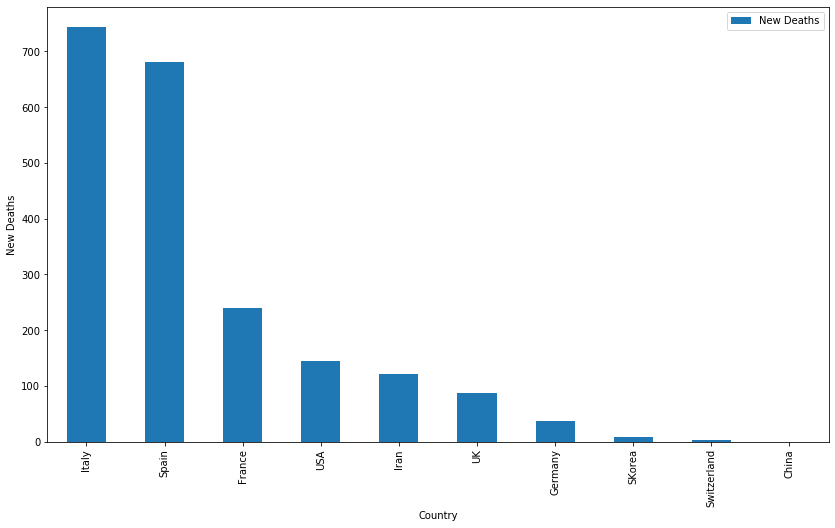

In [58]:
xCountry = top10["Country"]
yNewDeaths = top10["New Deaths"]
top10SortedByNewDeaths = top10.sort_values(by="New Deaths",inplace=True,ascending=False)
top10SortedByNewDeathsX = top10.plot(y="New Deaths",kind="bar")
_ = top10SortedByNewDeathsX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('New Deaths')

In [59]:
# plt.xlabel('Country')
# plt.ylabel('New Cases')
# plt.bar(xCountry,yNewCases)

<ipython-input-60-616a9c402fe6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10SortedByTotalRecovered = top10.sort_values(by="Total Recovered",inplace=True,ascending=False)


Text(0, 0.5, 'Total Recovered')

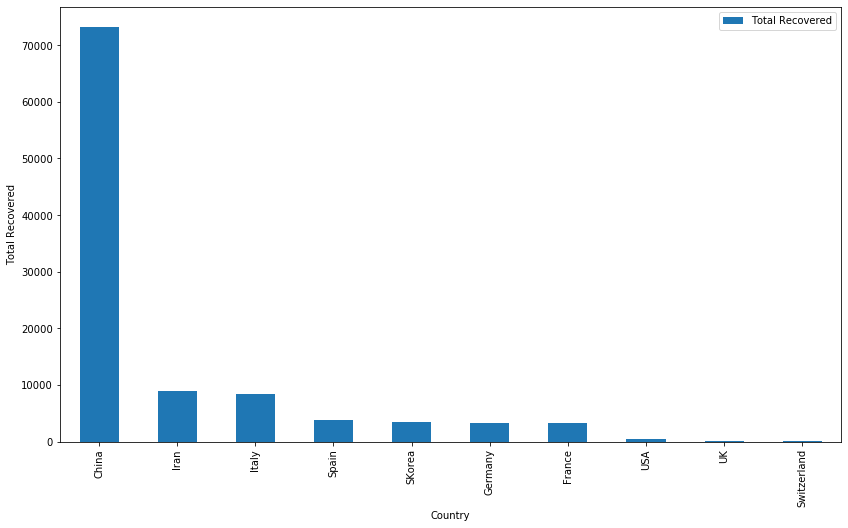

In [60]:
xCountry = top10["Country"]
yTotalRecovered = top10["Total Recovered"]
top10SortedByTotalRecovered = top10.sort_values(by="Total Recovered",inplace=True,ascending=False)
top10SortedByTotalRecoveredX = top10.plot(y="Total Recovered",kind="bar")
_ = top10SortedByTotalRecoveredX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('Total Recovered')

<ipython-input-61-e20fef2f21ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10SortedByActiveCases = top10.sort_values(by="Active Cases",inplace=True,ascending=False)


Text(0, 0.5, 'Active Cases')

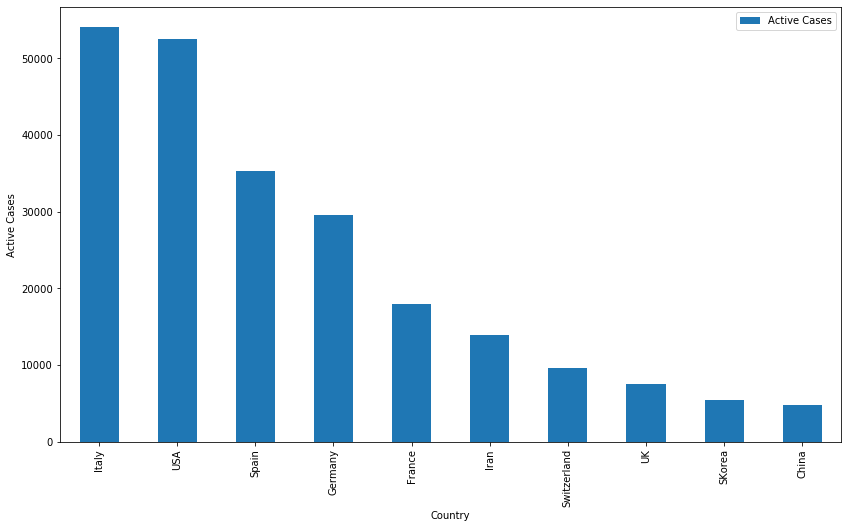

In [61]:
xCountry = top10["Country"]
yActiveCases = top10["Active Cases"]
top10SortedByActiveCases = top10.sort_values(by="Active Cases",inplace=True,ascending=False)
top10SortedByActiveCasesX = top10.plot(y="Active Cases",kind="bar")
_ = top10SortedByActiveCasesX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('Active Cases')

<ipython-input-62-e7bd8db66eec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10SortedBySeriousCritical = top10.sort_values(by="Serious/Critical",inplace=True,ascending=False)


Text(0, 0.5, 'Serious/Critical')

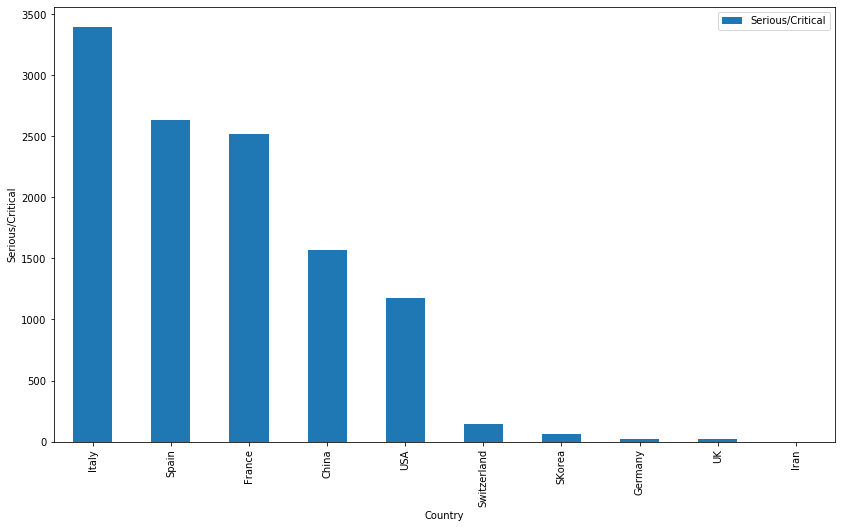

In [62]:
xCountry = top10["Country"]
ySeriousCritical = top10["Serious/Critical"]
top10SortedBySeriousCritical = top10.sort_values(by="Serious/Critical",inplace=True,ascending=False)
top10SortedBySeriousCriticalX = top10.plot(y="Serious/Critical",kind="bar")
_ = top10SortedBySeriousCriticalX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('Serious/Critical')

<ipython-input-63-bde5fa876759>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10SortedByTotalCasesPer1M = top10.sort_values(by="Total Cases/1 Population",inplace=True,ascending=False)


Text(0, 0.5, 'Total Cases/1M Population')

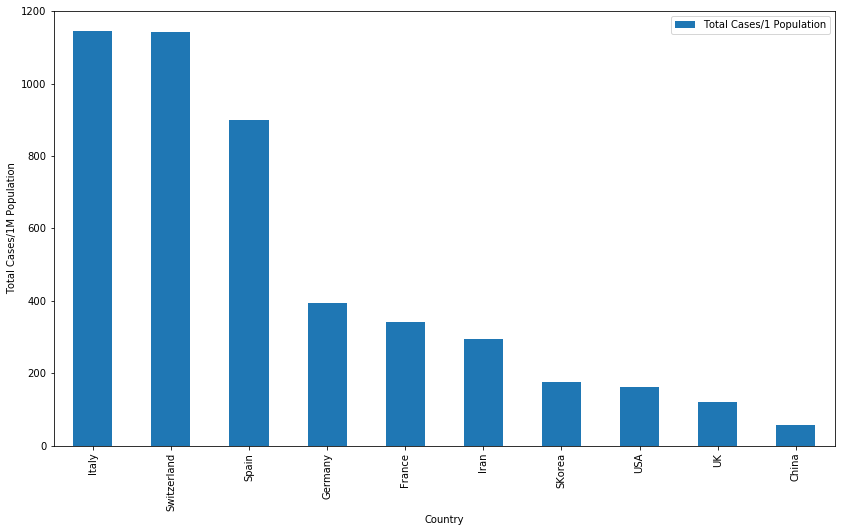

In [63]:
xCountry = top10["Country"]
ySeriousCritical = top10["Total Cases/1 Population"]
top10SortedByTotalCasesPer1M = top10.sort_values(by="Total Cases/1 Population",inplace=True,ascending=False)
top10SortedByTotalCasesPer1MX = top10.plot(y="Total Cases/1 Population",kind="bar")
_ = top10SortedByTotalCasesPer1MX.set_xticklabels(top10['Country'])
plt.xlabel('Country')
plt.ylabel('Total Cases/1M Population')